OBJECTIVE:
From independent features data points we have to find the data points of that features are belongs to which
category of denpendent varibale data points.

* Load the Excel data of Haberman with changed column names

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#Loading the haberman excel
haberman_data = pd.read_excel('D:\\AI_stuff\\dataset\\haberman.xlsx')

labels = ['age','operation_year','axil_nodes','survival_status']
haberman_data.columns = labels


* Number of datapoints and features
* from the data I am considering age,operation_year and axil_nodes are independent variable
* survival_status is the dependent varible

In [2]:
print(haberman_data.shape)

(305, 4)


*Columns present in haberman

In [3]:
print(haberman_data.columns)

Index(['age', 'operation_year', 'axil_nodes', 'survival_status'], dtype='object')


number of Data-Points of each class

In [4]:
patient_survival_data = {1:'Patient_survived',2:'Patient_died'}

haberman_data['survival_status'] = haberman_data['survival_status'].map({1:'Patient_survived',2:'Patient_died'})

haberman_data['survival_status'].value_counts()

haberman_data.head(10)

,age,operation_year,axil_nodes,survival_status
0,30,62,3,Patient_survived
1,30,65,0,Patient_survived
2,31,59,2,Patient_survived
3,31,65,4,Patient_survived
4,33,58,10,Patient_survived
5,33,60,0,Patient_survived
6,34,59,0,Patient_died
7,34,66,9,Patient_died
8,34,58,30,Patient_survived
9,34,60,1,Patient_survived


In [5]:
print("Is there any missing values")

print(haberman_data.isnull().sum())

Is there any missing values
age                0
operation_year     0
axil_nodes         0
survival_status    0
dtype: int64


Observation:
1. From above caluclations it states that it is imbalanced data set.

2. ther is no missing or null values in data set.

High Level Statistics

In [6]:
haberman_survival = haberman_data[haberman_data["survival_status"] == "Patient_survived"]
haberman_survival_died = haberman_data[haberman_data["survival_status"] == "Patient_died"]


In [7]:
#Mean of three features who belongs patient survived
print('Means of who survived')
print(np.mean(haberman_survival['age']))
print(np.mean(haberman_survival['operation_year']))
print(np.mean(haberman_survival['axil_nodes']))

#MEan of three fetures who belongs patient died
print('Means of who are not survived')
print(np.mean(haberman_survival_died['age']))
print(np.mean(haberman_survival_died['operation_year']))
print(np.mean(haberman_survival_died['axil_nodes']))

#Standard deviation of three features who belongs patient survived
print('Standard deviation of who survived')
print(np.std(haberman_survival['age']))
print(np.std(haberman_survival['operation_year']))
print(np.std(haberman_survival['axil_nodes']))

#standard deviation of three fetures who belongs patient died
print('Standard deviation of who are not survived')
print(np.std(haberman_survival_died['age']))
print(np.std(haberman_survival_died['operation_year']))
print(np.std(haberman_survival_died['axil_nodes']))


Means of who survived
52.11607142857143
62.857142857142854
2.799107142857143
Means of who are not survived
53.67901234567901
62.82716049382716
7.45679012345679
Standard deviation of who survived
10.913004640364269
3.2220145175061514
5.869092706952767
Standard deviation of who are not survived
10.10418219303131
3.3214236255207883
9.128776076761632


In [8]:
#median of three features who belongs patient survived
print('median of who survived')
print(np.median(haberman_survival['age']))
print(np.median(haberman_survival['operation_year']))
print(np.median(haberman_survival['axil_nodes']))

#median of three fetures who belongs patient died
print('median of who are not survived')
print(np.median(haberman_survival_died['age']))
print(np.median(haberman_survival_died['operation_year']))
print(np.median(haberman_survival_died['axil_nodes']))

#Quantiles of three features who belongs patient survived
print('Quantitles of who survived')
print(np.percentile(haberman_survival['age'],np.arange(0,100,25)))
print(np.percentile(haberman_survival['operation_year'],np.arange(0,100,25)))
print(np.percentile(haberman_survival['axil_nodes'],np.arange(0,100,25)))

#Quantiles of three fetures who belongs patient died
print('Quantile of who are not survived')
print(np.percentile(haberman_survival_died['age'],np.arange(0,100,25)))
print(np.percentile(haberman_survival_died['operation_year'],np.arange(0,100,25)))
print(np.percentile(haberman_survival_died['axil_nodes'],np.arange(0,100,25)))

#95 percentile of three features who belongs patient survived
print('95 percentile of who survived')
print(np.percentile(haberman_survival['age'],95))
print(np.percentile(haberman_survival['operation_year'],95))
print(np.percentile(haberman_survival['axil_nodes'],95))

#Quantiles of three fetures who belongs patient died
print('Quantile of who are not survived')
print(np.percentile(haberman_survival_died['age'],95))
print(np.percentile(haberman_survival_died['operation_year'],95))
print(np.percentile(haberman_survival_died['axil_nodes'],95))

from statsmodels import robust

print("Median Absolute deviation for patients who are survived")
print(robust.mad(haberman_survival['age']))
print(robust.mad(haberman_survival['operation_year']))
print(robust.mad(haberman_survival['axil_nodes']))

print("Median Absolute deviation for patients who are not survived")
print(robust.mad(haberman_survival_died['age']))
print(robust.mad(haberman_survival_died['operation_year']))
print(robust.mad(haberman_survival_died['axil_nodes']))


median of who survived
52.0
63.0
0.0
median of who are not survived
53.0
63.0
4.0
Quantitles of who survived
[30. 43. 52. 60.]
[58. 60. 63. 66.]
[0. 0. 0. 3.]
Quantile of who are not survived
[34. 46. 53. 61.]
[58. 59. 63. 65.]
[ 0.  1.  4. 11.]
95 percentile of who survived
70.0
68.0
14.0
Quantile of who are not survived
70.0
68.0
23.0
Median Absolute deviation for patients who are survived
13.343419966550417
4.447806655516806
0.0
Median Absolute deviation for patients who are not survived
11.860817748044816
4.447806655516806
5.930408874022408


UNIVARIATE analysis

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


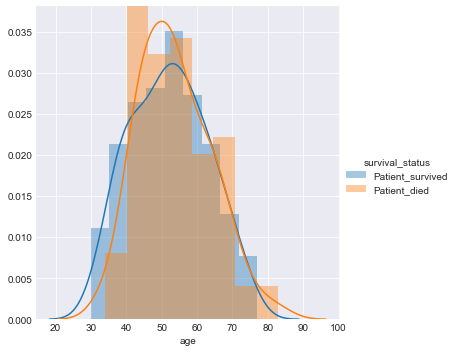

In [9]:
sn.set_style('darkgrid')
(sn.FacetGrid(haberman_data, hue = 'survival_status' , size = 5)
       .map(sn.distplot , 'age').add_legend())
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


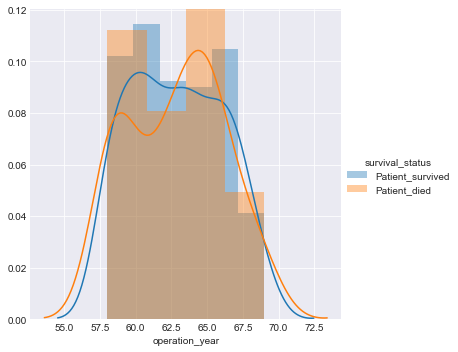

In [10]:
sn.set_style('darkgrid')

(sn.FacetGrid(haberman_data, hue = 'survival_status' , size = 5)
       .map(sn.distplot , 'operation_year').add_legend())

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


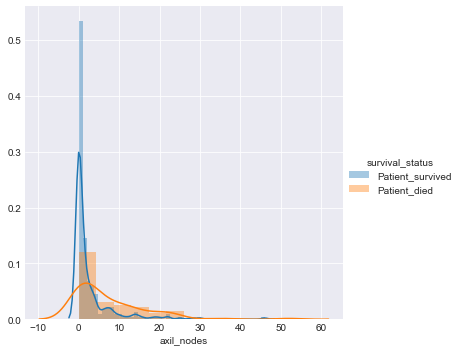

In [11]:
sn.set_style('darkgrid')
(sn.FacetGrid(haberman_data, hue = 'survival_status' , size = 5)
       .map(sn.distplot , 'axil_nodes').add_legend())

Performing PDF and CDF

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


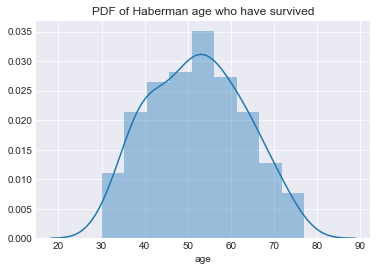

In [12]:
plt.title("PDF of Haberman age who have survived")
sn.set_style('darkgrid')
sn.distplot(haberman_survival['age'])


The above figure has combo of histogram and the curve called PDF 

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


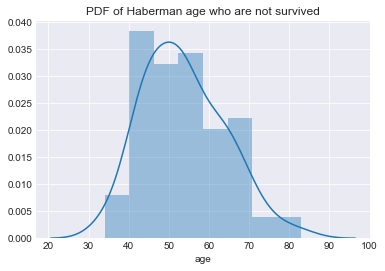

In [13]:
plt.title("PDF of Haberman age who are not survived")
sn.set_style('darkgrid')
sn.distplot(haberman_survival_died['age'])

Now caluculate PDF and CDF
 
First three graphs show survival data by using three features age, operation_year and axil_nodes
Second three graphs show survival data  of died by using three features age, operation_year and axil_nodes
 
We can show it by using one features but due to imbalance we can't define it in one feature and also we have senn pair plots no two features relative dependent variable

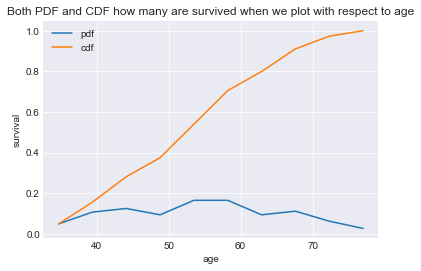

In [14]:
array_values,bin_count = np.histogram(haberman_survival['age'] , bins = 10)



#from that array values do the CDF

pdf = array_values/sum(array_values)
cdf = np.cumsum(pdf)

plt.title("Both PDF and CDF how many are survived when we plot with respect to age")
plt.plot(bin_count[1:],pdf)
plt.plot(bin_count[1:],cdf)
plt.xlabel("age")
plt.ylabel("survival")
plt.legend(['pdf','cdf'])
plt.show()


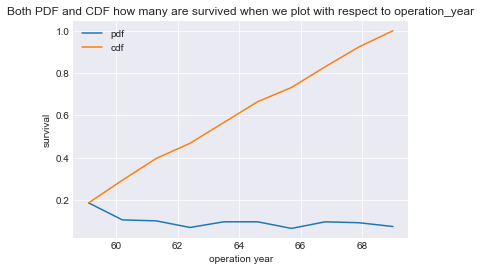

In [15]:
array_values,bin_count = np.histogram(haberman_survival['operation_year'] , bins = 10)


#from that array values do the CDF

pdf = array_values/sum(array_values)
cdf = np.cumsum(pdf)
plt.title("Both PDF and CDF how many are survived when we plot with respect to operation_year")
plt.plot(bin_count[1:],pdf)
plt.plot(bin_count[1:],cdf)
plt.xlabel("operation year")
plt.ylabel("survival")
plt.legend(['pdf','cdf'])
plt.show()

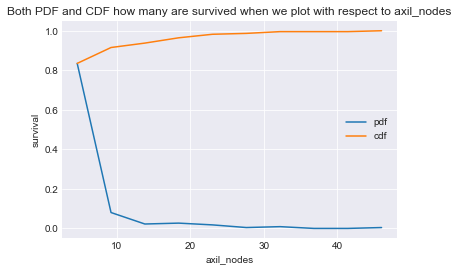

In [16]:
array_values,bin_count = np.histogram(haberman_survival['axil_nodes'] , bins = 10)


#from that array values do the CDF

pdf = array_values/sum(array_values)
cdf = np.cumsum(pdf)
plt.title("Both PDF and CDF how many are survived when we plot with respect to axil_nodes")
plt.plot(bin_count[1:],pdf)
plt.plot(bin_count[1:],cdf)
plt.xlabel("axil_nodes")
plt.ylabel("survival")
plt.legend(['pdf','cdf'])
plt.show()

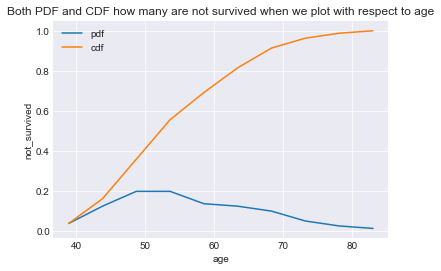

In [17]:
array_values,bin_count = np.histogram(haberman_survival_died['age'] , bins = 10)


#from that array values do the CDF

pdf = array_values/sum(array_values)
cdf = np.cumsum(pdf)

plt.title("Both PDF and CDF how many are not survived when we plot with respect to age")
plt.plot(bin_count[1:],pdf)
plt.plot(bin_count[1:],cdf)
plt.xlabel("age")
plt.ylabel("not_survived")
plt.legend(['pdf','cdf'])
plt.legend(['pdf','cdf'])
plt.show()

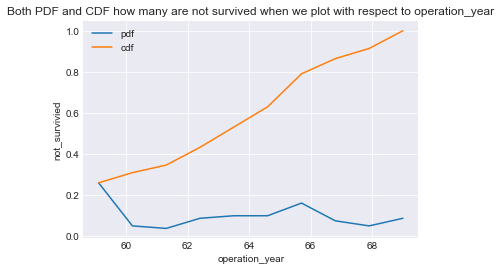

In [18]:
array_values,bin_count = np.histogram(haberman_survival_died['operation_year'] , bins = 10)


#from that array values do the CDF

pdf = array_values/sum(array_values)
cdf = np.cumsum(pdf)

plt.title("Both PDF and CDF how many are not survived when we plot with respect to operation_year")
plt.plot(bin_count[1:],pdf)
plt.plot(bin_count[1:],cdf)
plt.xlabel("operation_year")
plt.ylabel("not_survivied")
plt.legend(['pdf','cdf'])
plt.show()

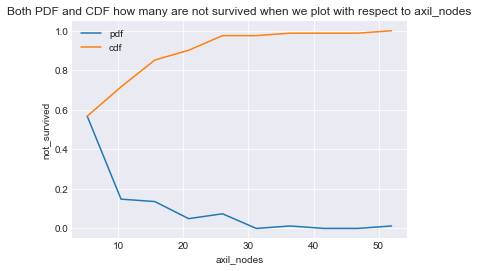

In [19]:
array_values,bin_count = np.histogram(haberman_survival_died['axil_nodes'] , bins = 10)


#from that array values do the CDF

pdf = array_values/sum(array_values)
cdf = np.cumsum(pdf)

plt.title("Both PDF and CDF how many are not survived when we plot with respect to axil_nodes")
plt.plot(bin_count[1:],pdf)
plt.plot(bin_count[1:],cdf)
plt.xlabel("axil_nodes")
plt.ylabel("not_survived")
plt.legend(['pdf','cdf'])
plt.show()

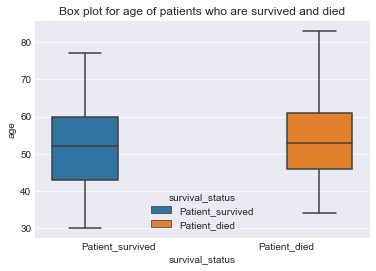

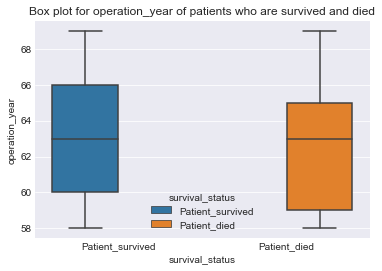

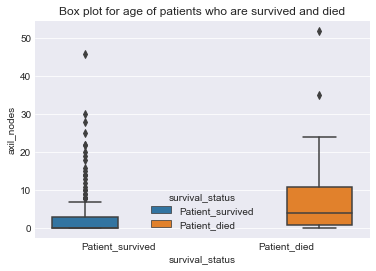

In [20]:
plt.title("Box plot for age of patients who are survived and died")
sn.boxplot(data = haberman_data,hue = 'survival_status',x = 'survival_status' , y = 'age')
plt.show()
plt.title("Box plot for operation_year of patients who are survived and died")
sn.boxplot(data = haberman_data,hue = 'survival_status',x = 'survival_status' , y = 'operation_year')
plt.show()
plt.title("Box plot for age of patients who are survived and died")
sn.boxplot(data = haberman_data,hue = 'survival_status',x = 'survival_status' , y = 'axil_nodes')
plt.show()


Observation of Box plot

1. Here I am plotting for 3 independent features because no single feature is more relative feature to dependent feature

2. The box plot tells median, IQR, lowest and highest extremes

3. At the age 60 nearly 75% of the patients are survived

4. When you observe the medians of operation year of patients who are survived and not survived is almost same

5. The advantage of Box plot is that is shows directly their is no person who are less than age 30.

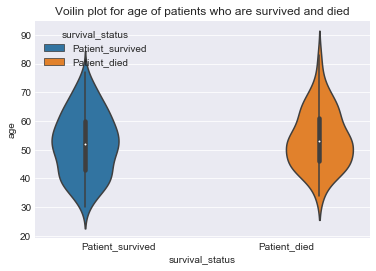

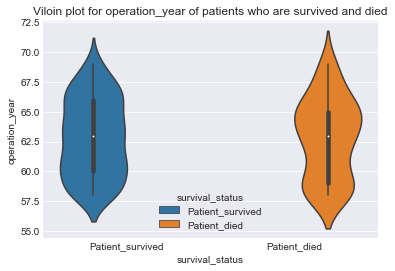

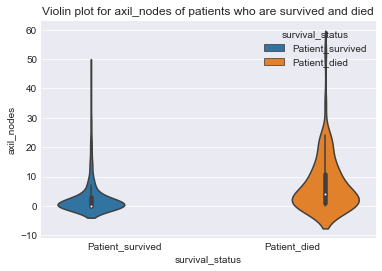

In [21]:
plt.title("Voilin plot for age of patients who are survived and died")
sn.violinplot(data = haberman_data,hue = 'survival_status',x = 'survival_status' , y = 'age')
plt.show()
plt.title("Viloin plot for operation_year of patients who are survived and died")
sn.violinplot(data = haberman_data,hue = 'survival_status',x = 'survival_status' , y = 'operation_year')
plt.show()
plt.title("Violin plot for axil_nodes of patients who are survived and died")
sn.violinplot(data = haberman_data,hue = 'survival_status',x = 'survival_status' , y = 'axil_nodes')
plt.show()

OBERVATION:

1. Viloin plot is combo of Box plot and density function

2. Almost at age of 55 have more dense so it gives that the patients are survived with in that age are more.

3. At age 50 have more density where Patients are not survived more.

4. The operation year 1960 show where the patients are survived because it has more dense

5. at the same 1964 has more patients have who are not suvived

BI-Variate Analysis

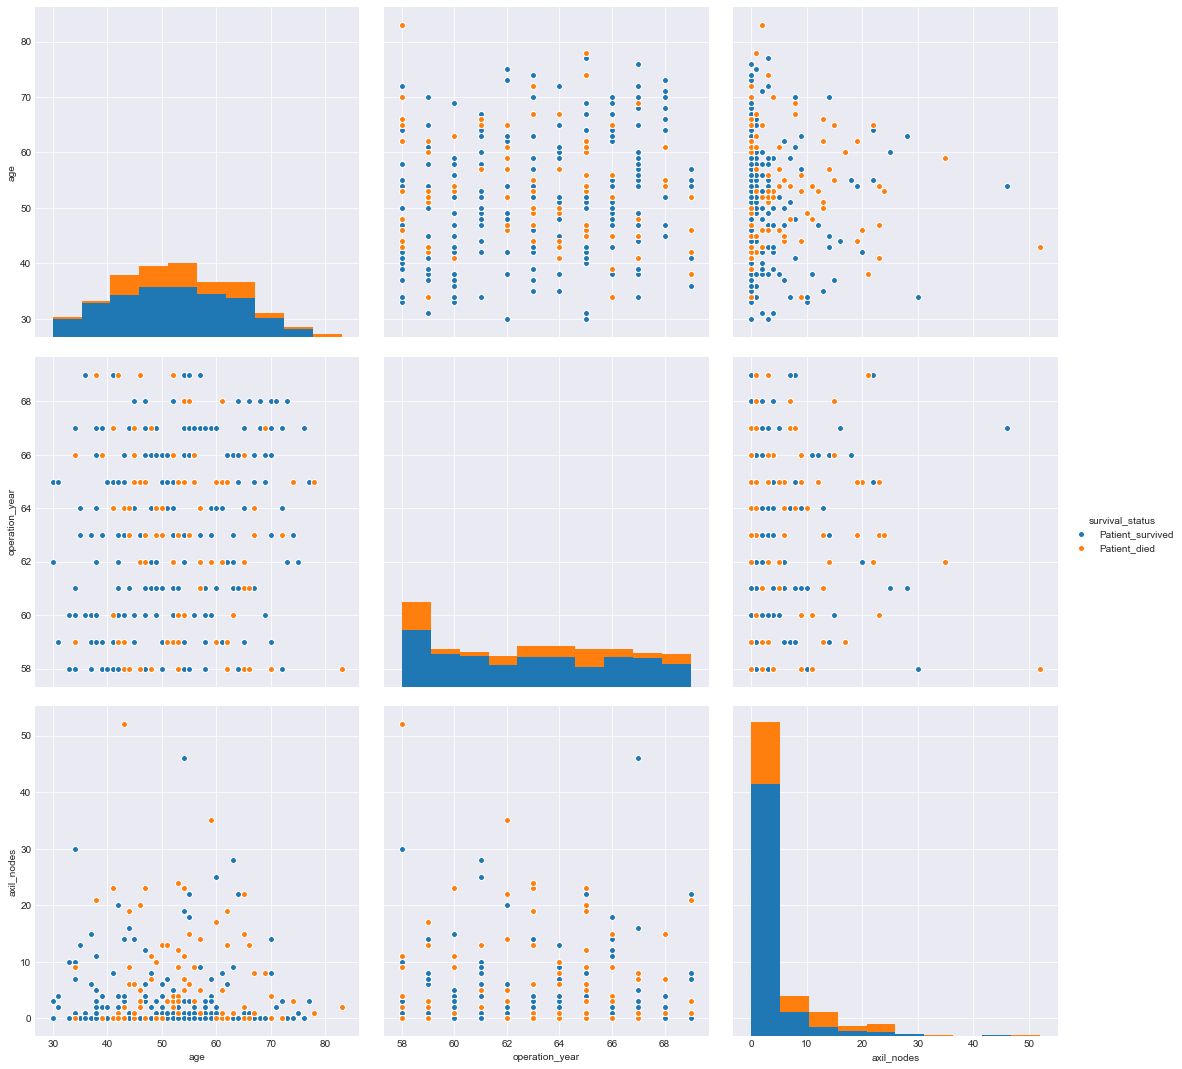

In [24]:
plt.close()
sn.set_style('darkgrid')
sn.pairplot(haberman_data, hue = 'survival_status',size=5)
plt.show()

OBSERVATION:

1. Every pair plot of data points are over lapped

2. Because of imbalanced data set every plot has been overlapped and there is no independent feature which is more relative to dependent variable